In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import os
from collections import OrderedDict
import uproot
import pandas as pd
import sys
import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0
wH = 1
Z_MASS = 91.2
# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [2]:
%%time
fpath =OrderedDict()
tree = OrderedDict()
path = '/storage//cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v93/normalized/'
fpath['ee, m_{s} = 0.1 GeV, c#tau = 100 mm'] =path + 'ggH_HToSS_SToEE_ms0p1_pl100_137000pb_weighted.root'
fpath['ee, m_{s} = 0.4 GeV, c#tau = 500 mm'] = path + 'ggH_HToSS_SToEE_ms0p1_pl500_137000pb_weighted.root'
fpath['ee, m_{s} = 4 GeV, c#tau = 500 mm'] = path + 'ggH_HToSS_SToEE_ms0p4_pl500_137000pb_weighted.root'
fpath['#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau = 100 mm'] = path + 'ggH_HToSS_SToPi0Pi0_ms1_pl100_137000pb_weighted.root'
fpath['#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau= 500 mm'] = path + 'ggH_HToSS_SToPi0Pi0_ms1_pl500_137000pb_weighted.root'
fpath['k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm'] = path + 'ggH_HToSS_SToKPlusKMinus_ms1p5_pl500_137000pb_weighted.root'
fpath['#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm'] = path + 'ggH_HToSS_SToPiPlusPiMinus_ms1_pl500_137000pb_weighted.root'
for k,v in fpath.items():
    print (k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['MuonSystem']
    print(len(tree[k]))

ee, m_{s} = 0.1 GeV, c#tau = 100 mm /storage//cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v93/normalized/ggH_HToSS_SToEE_ms0p1_pl100_137000pb_weighted.root
156279
ee, m_{s} = 0.4 GeV, c#tau = 500 mm /storage//cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v93/normalized/ggH_HToSS_SToEE_ms0p1_pl500_137000pb_weighted.root
65839
ee, m_{s} = 4 GeV, c#tau = 500 mm /storage//cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v93/normalized/ggH_HToSS_SToEE_ms0p4_pl500_137000pb_weighted.root
30343
#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau = 100 mm /storage//cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v93/normalized/ggH_HToSS_SToPi0Pi0_ms1_pl100_137000pb_weighted.root
156402
#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau= 500 mm /storage//cms/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v93/normaliz

a
a
a
a
a
a
a


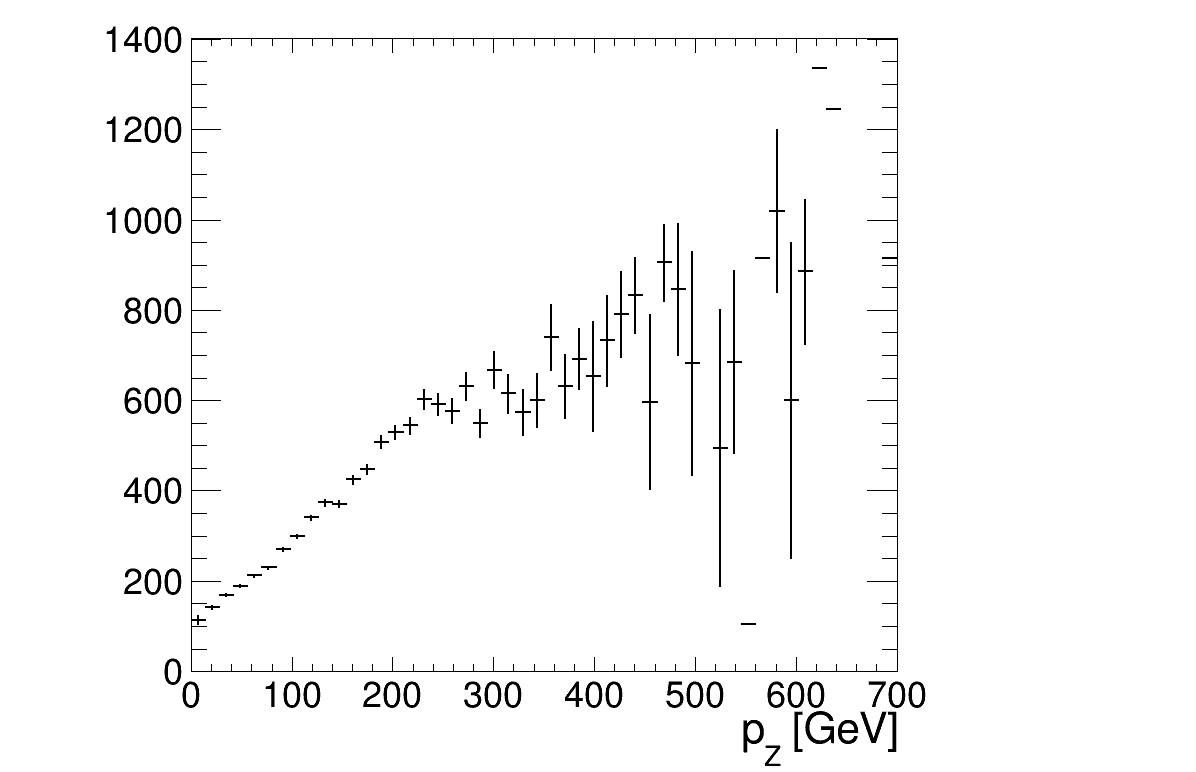

In [3]:

JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
jetPt_cut = 50
cluster_index = '3'
gLLP_decay_vertex_r={}
cscRechitCluster3_match_gLLP_decay_r={}
gLLP_decay_vertex_z={}
cscRechitCluster3_match_gLLP_decay_z={}

weight = {}
pileupWeight = {}

evtNum = {}
runNum = {}
lumiSec = {}
sel_ev = {}
gLLP_beta = {}
gLLP_csc = {}
gLLP_ctau = {}
gLLP_eta={}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterPhi = {}
cscRechitClusterEta = {}
cscRechitCluster3NStation = {}
cscRechitClusterNChamber = {}
cscRechitClusterSize = {}
cscRechitClusterAvgStation = {}
cscRechitCluster3XSpread={}
cscRechitCluster3YSpread={}
cscRechitClusterSize={}
cscRechitCluster3Eta={}
cscRechitCluster3AvgStation5={}
weight_ctau={}
NEWweight_ctau={}
t1NEW={}
t2NEW={}
weight_ctauNew={}
sel_ev2={}
gLLP_eta2={}
cluster_match_eta={}
weight_ctau_1002500={}
#print(type(cscRechitCluster))
gLLP_e={}
cluster_match_energy={}
cscRechitCluster3_match_gLLP_pt={}
cscRechitCluster3Z={}
cscRechitClusterSize3={}
newL=[]
#print(tree.items())
for k, T in tree.items():
    print('a')
########### SELECTION: CLUSTERS ############

    sel_rechitcluster = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_csc') ==1   #this pone!!
    sum_sel_rechitcluster = sel_rechitcluster.any()

########### SELECTION: JETS ############
   
    sel_jet = np.logical_and(T.array('jetPt') > jetPt_cut, np.abs(T.array('jetEta')) < 2.4 )


########### SELECTION: EVENTS ############
   

########### SELECTION: EVENTS ############
    sel_ev[k] = (np.sum(T.array('gLLP_csc'),axis = 1) > 0)
    sel_ev[k]  = np.logical_and(sel_ev[k],sel_rechitcluster.sum() == 1)
    gLLP_beta[k] = T.array('gLLP_beta')[sel_ev[k]]
    gLLP_csc[k] = T.array('gLLP_csc')[sel_ev[k]]
    gLLP_eta[k]= T.array('gLLP_eta')[T.array('gLLP_csc')==1]  
    gLLP_e[k]= T.array('gLLP_e')[T.array('gLLP_csc')==1] 
    gLLP_decay_vertex_r[k]=T.array('gLLP_decay_vertex_r')[T.array('gLLP_csc')==1] 
    gLLP_decay_vertex_z[k]= T.array('gLLP_decay_vertex_z')[T.array('gLLP_csc')==1] 
    weight[k] = T.array('weight')[sel_ev[k]]
    evtNum[k] =  T.array('evtNum')[sel_ev[k]]  
    runNum[k] =  T.array('runNum')[sel_ev[k]]
    lumiSec[k] =  T.array('lumiSec')[sel_ev[k]]
    cscRechitClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitCluster3NStation[k] = T.array('cscRechitCluster' + cluster_index + 'NStation')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterX[k] = T.array('cscRechitCluster' + cluster_index + 'X')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitCluster3XSpread[k]=T.array('cscRechitCluster' + cluster_index + 'XSpread')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitCluster3YSpread[k]=T.array('cscRechitCluster' + cluster_index + 'YSpread')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterY[k] = T.array('cscRechitCluster' + cluster_index + 'Y')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterZ[k] = T.array('cscRechitCluster' + cluster_index + 'Z')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterAvgStation[k] = T.array('cscRechitCluster' + cluster_index + 'AvgStation5')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitCluster3Z[k]= T.array('cscRechitCluster' + cluster_index + 'Z')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitCluster3_match_gLLP_decay_z[k]=(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_decay_z'))[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterEta[k]= np.abs(cscRechitClusterEta[k])
    cscRechitClusterAvgStation[k]=np.abs(cscRechitClusterAvgStation[k])
    cluster_match_eta[k]= T.array('cscRechitCluster' + cluster_index + '_match_gLLP_eta')[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitCluster3_match_gLLP_pt[k] = (T.array('cscRechitCluster' + cluster_index + '_match_gLLP_pt'))[sel_rechitcluster][sel_ev[k]].flatten()
    cscRechitClusterSize3[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster]
    cluster_match_energy[k]= ((T.array('cscRechitCluster' + cluster_index + '_match_gLLP_e'))[sel_rechitcluster])
    cscRechitCluster3_match_gLLP_decay_r[k]=((T.array('cscRechitCluster' + cluster_index + '_match_gLLP_decay_r'))[sel_rechitcluster])
start_t = time.time()
c = rt.TCanvas('c','c', 1200, 800)
h = {}
momentumZ={}
leg = rt.TLegend(0.36,.79,0.5,0.94)  # 1= left/right, 2= height/space out of legend vertical 3 = space of legend horiz
# 4 = vertical height 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
keys= ('ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 'ee, m_{s} = 4 GeV, c#tau = 500 mm', '#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau = 100 mm',
     '#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau= 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm', '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm') 
momentumZ[k]= (cscRechitCluster3_match_gLLP_pt[k].flatten())*np.sinh(cluster_match_eta[k].flatten())
h[k] = create_TH2D((np.column_stack((momentumZ[k],cscRechitClusterSize[k]))), axis_title=['p_{Z} [GeV]','Rechit Cluster Size', 'Number of Events'], name=k, binning=[50,0,700,50,0,1500])
h[k] = h[k].ProfileX()
h[k].Draw()
c.SetLogz()
c.SetRightMargin(.25)
rt.gPad.Update()
#c.SetLeftMargin(.8)
c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: ps file c.ps has been created


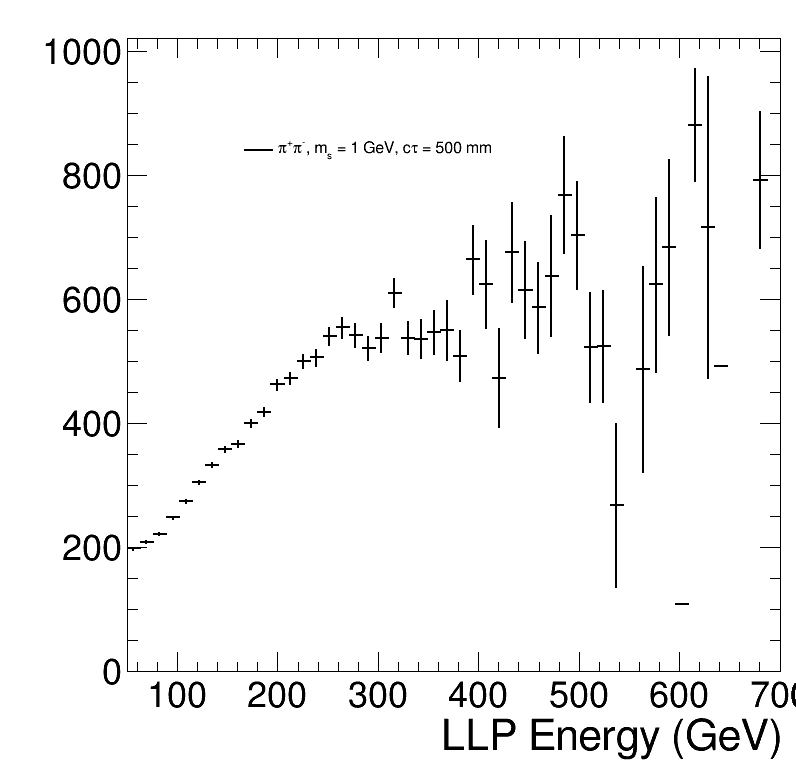

In [4]:
#### start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
j = {}
pEff1 = {}
leg = rt.TLegend(0.3, 0.74, 0.5, 0.87) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)
keys = ['ee, m_{s} = 0.1 GeV, c#tau = 100 mm', 'ee, m_{s} = 0.4 GeV, c#tau = 500 mm', 'ee, m_{s} = 4 GeV, c#tau = 500 mm', '#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau = 100 mm',
     '#pi^{0}#pi^{0}, m_{s} = 0.1 GeV, c#tau= 500 mm', 'k^{+}k^{-}, m_{s} = 1.5 GeV, c#tau = 500 mm', '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm']
k=  '#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm'
cluster_match_energy[k] = np.abs(cluster_match_energy[k])
cscRechitClusterSize3[k] = np.abs(cscRechitClusterSize3[k] )  
h[k] = create_TH2D((np.column_stack((np.concatenate(cluster_match_energy[k], axis=0),np.concatenate(cscRechitClusterSize3[k], axis=0)))), 
                       axis_title=['LLP Energy (GeV)','Cluster Size', 'Number of Events'], name=k, binning=[50,50,700,50,0,1200])
h[k] = h[k].ProfileX()
h[k].Draw()
leg.AddEntry(h[k],k)
#h[k].Draw('colz')   
#c.SetLogz()
c.Draw()
leg.Draw()
c.SaveAs()


[[1, 45.06], [2, 62.16], [3, 77.28], [4, 92.08], [5, 86.2], [6, 74.94], [7, 60.4], [8, 48.86], [9, 38.34], [10, 29.02], [11, 25.08], [12, 19.12], [13, 15.82], [14, 12.76], [15, 9.5], [16, 9.08], [17, 6.3], [18, 5.44], [19, 5.18], [20, 3.36], [21, 3.32], [22, 2.6], [23, 1.92], [24, 1.46], [25, 1.18], [26, 1.06], [27, 0.76], [28, 0.6], [29, 0.36], [30, 0.36], [31, 0.3], [32, 0.4], [33, 0.28], [34, 0.16], [35, 0.2], [36, 0.22], [37, 0.12], [38, 0.06], [39, 0.0], [40, 0.1], [41, 0.12], [42, 0.06], [43, 0.02], [44, 0.1], [45, 0.06], [46, 0.02], [47, 0.0], [48, 0.0], [49, 0.04], [50, 0.0]]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: ps file c.ps has been created


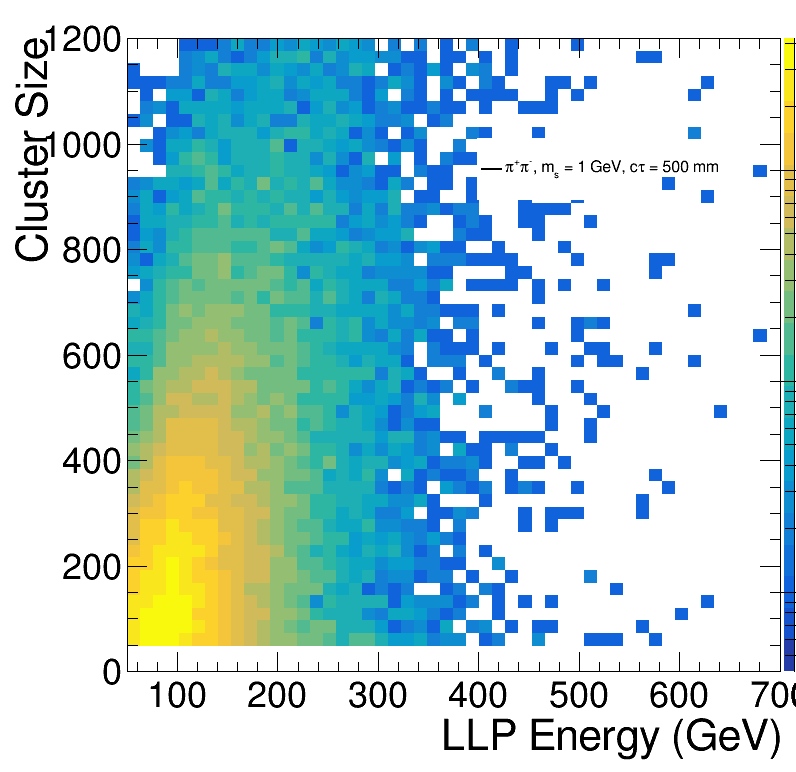

In [7]:
start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
j = {}
pEff1 = {}
leg = rt.TLegend(0.60, 0.74, 0.74, 0.82) 
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetTextFont(42)

k='#pi^{+}#pi^{-}, m_{s} = 1 GeV, c#tau = 500 mm'
cluster_match_energy[k] = np.abs(cluster_match_energy[k])
cscRechitClusterSize3[k] = np.abs(cscRechitClusterSize3[k] )  
h[k] = create_TH2D((np.column_stack((np.concatenate(cluster_match_energy[k], axis=0),np.concatenate(cscRechitClusterSize3[k], axis=0)))), 
                       axis_title=['LLP Energy (GeV)','Cluster Size', 'Number of Events'], name=k, binning=[50,50,700,50,0,1200])
leg.AddEntry(h[k],k)
h[k].Draw('colz')  

def newProfX():
    newL = []
    for i in range(1, h[k].GetNbinsX() + 1):
        count = 0
        for j in range(1, h[k].GetNbinsY() + 1):
            count += h[k].GetBinContent(i, j)
        averageCount = count / h[k].GetNbinsY()
        newL.append([i, averageCount])
    return newL
print(newProfX())
c.SetLogz()
#c.SetRightMargin(.2)
c.Draw()
leg.Draw()
c.SaveAs()
